<a href="https://colab.research.google.com/github/MJ-GINI/AiffelRepository/blob/main/%5B%E1%84%83%E1%85%A6%E1%84%8A%E1%85%A16%E1%84%80%E1%85%B5%5D%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%90%E1%85%A9%E1%86%AB_M2_%E1%84%82%E1%85%A9%E1%84%83%E1%85%A1%E1%86%B7%E1%84%8F%E1%85%A6%E1%84%8B%E1%85%A5%E1%84%91%E1%85%A9%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%90%E1%85%B3_251201_eunbyul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

print(train.shape, test.shape)
train.head()

(159256, 24) (106171, 23)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

결측치 X

In [ ]:
pd.set_option('display.max_columns', None)
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


age: 40살 비율이 많은가보다..

-> 흡연기간이 길수록 몸에 나타나는 영향이 좀 크지 않을까, 연령 구간 생성?

-> 장기 흡연자는 파악이 쉽지만, 단기 흡연자는 파악하기 어려울수도(나이 어릴 수록 예측 어려움?)

height, weight vs waist: height랑 같이 파생변수 BMI 만들어서 waist랑 같이 보기

-> 장기 흡연자는 복부비만 증가인데, BMI 낮아서 BMI-waist 불일치하는 경우 좀 있다고?

eyesight, hearing: 장기 흡연자는 왼/오 불균형 올 수도.. / -

systolic, relaxation : 니코틴 때문에 수축기/이완기 혈압 둘 다 상승? 젊은 흡연자에서 고혈압 전 단계가 많이 관찰됐다고 함

(단기 흡연자? 젊은 흡연자,,, 예측 가능?)

-> 흡연자는 맥압(systolic-relaxation) 높다고? 파생변수 ㄱㄱ

fasting blood sugar : 흡연자는 혈당 상승, 당뇨병 발병 확률 높음

-> 126 이상이면 당뇨, 근데 75%가 103임....!!!!?? 흡연자가 당뇨 무조건 발병 x (흡연자가 43.7%니까)

Cholesterol : 흡연자는 HDL이 낮고 TG·LDL이 높아짐, 총콜레스테롤도 대체로 ↑

-> HDL / LDL ratio, TG / HDL ratio 등 파악?

hemoglobin : 흡연자가 hemoglobin 수치 높음

-> 빈혈은 12g/dL보다 작은거, 그럼 빈혈이면 흡연자 x?

Urine protein, serum creatinine : 흡연자는 신장 관련 수치 높음

AST, ALT : 흡연 단독보다는 +음주/비만일때 상승(AST/ALT ratio?)

GTP : 흡연과도 독립적으로 상승한다는 연구? 음주가 가장 밀접

-> 평균적으로 흡연자가 높음(GTP>40)

dental caries : 강력한 신호지만 데이터 비율 낮음....

앙상블 시 스태킹 메타모델 라쏘 말고 릿지로.....?

(흡연자들이 증상 다 같은 거 아니고, 사람마다 안좋아지는 부위가 다를수도 있고,,,,)

(필요없는 변수 제거 한다기보다는 다 살리는 쪽으로?)

In [ ]:
# 타겟 분포 확인
target_col = "smoking"

train[target_col].value_counts(), train[target_col].value_counts(normalize=True)

(smoking
 0    89603
 1    69653
 Name: count, dtype: int64,
 smoking
 0    0.562635
 1    0.437365
 Name: proportion, dtype: float64)

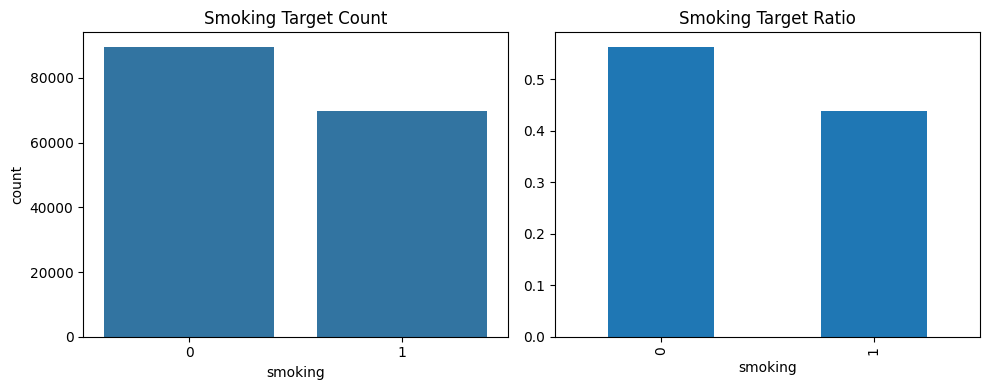

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=target_col, data=train, ax=ax[0])
ax[0].set_title("Smoking Target Count")

train[target_col].value_counts(normalize=True).plot(
    kind="bar",
    ax=ax[1]
)
ax[1].set_title("Smoking Target Ratio")

plt.tight_layout()
plt.show()

심한 불균형 X

In [ ]:
import pandas as pd

# 컬럼명
EYEL_COL = "eyesight(left)"
EYER_COL = "eyesight(right)"
HEARL_COL = "hearing(left)"
HEARR_COL = "hearing(right)"

# ========================
# 1) 시력 구간화 (0.1 ~ 9.9)
# ========================
eye_bins = [0.1, 2, 4, 6, 8, 10]
eye_labels = [
    "Very Bad (0.1~2)",
    "Bad (2~4)",
    "Normal (4~6)",
    "Good (6~8)",
    "Very Good (8~10)"
]

train["eye_left_bin"] = pd.cut(train[EYEL_COL], bins=eye_bins, labels=eye_labels, include_lowest=True)
train["eye_right_bin"] = pd.cut(train[EYER_COL], bins=eye_bins, labels=eye_labels, include_lowest=True)

# ========================
# 2) 청력 구간화 (1.0 ~ 2.0)
# ========================
hear_bins = [1.0, 1.3, 1.7, 2.1]
hear_labels = [
    "Normal (1.0~1.3)",
    "Mild Loss (1.3~1.7)",
    "Moderate Loss (1.7~2.0)"
]

train["hear_left_bin"] = pd.cut(train[HEARL_COL], bins=hear_bins, labels=hear_labels, include_lowest=True)
train["hear_right_bin"] = pd.cut(train[HEARR_COL], bins=hear_bins, labels=hear_labels, include_lowest=True)

# ========================
# 3) count 출력
# ========================
print("◼ Left Eye Count")
print(train["eye_left_bin"].value_counts().sort_index(), "\n")

print("◼ Right Eye Count")
print(train["eye_right_bin"].value_counts().sort_index(), "\n")

print("◼ Left Hearing Count")
print(train["hear_left_bin"].value_counts().sort_index(), "\n")

print("◼ Right Hearing Count")
print(train["hear_right_bin"].value_counts().sort_index())


◼ Left Eye Count
eye_left_bin
Very Bad (0.1~2)    159124
Bad (2~4)                0
Normal (4~6)             0
Good (6~8)               0
Very Good (8~10)       132
Name: count, dtype: int64 

◼ Right Eye Count
eye_right_bin
Very Bad (0.1~2)    159139
Bad (2~4)                0
Normal (4~6)             0
Good (6~8)               0
Very Good (8~10)       117
Name: count, dtype: int64 

◼ Left Hearing Count
hear_left_bin
Normal (1.0~1.3)           155438
Mild Loss (1.3~1.7)             0
Moderate Loss (1.7~2.0)      3818
Name: count, dtype: int64 

◼ Right Hearing Count
hear_right_bin
Normal (1.0~1.3)           155526
Mild Loss (1.3~1.7)             0
Moderate Loss (1.7~2.0)      3730
Name: count, dtype: int64


In [ ]:
train["dental caries"].value_counts()

,count
dental caries,
0,127724
1,31532


In [ ]:
train["dental caries"].value_counts(normalize=True)

,proportion
dental caries,
0,0.802004
1,0.197996


In [ ]:
pd.crosstab(train["dental caries"], train["smoking"], normalize='index')

smoking,0,1
dental caries,,
0,0.588918,0.411082
1,0.456172,0.543828


In [ ]:
# train[train["dental caries"] == 1]

In [ ]:
import pandas as pd

# =========================
# 1) LDL
# =========================
ldl_bins = [0, 100, 130, 160, 190, 300, 600, 2000]
ldl_labels = [
    "Normal (<100)",
    "Borderline (100-129)",
    "High (130-159)",
    "Very High (160-189)",
    "Extremely High (>=190)",
    "Abnormal (300-600)",
    "Severe Outlier (600-2000)"
]

train["LDL_bin"] = pd.cut(train["LDL"], bins=ldl_bins, labels=ldl_labels, include_lowest=True)

print("\n[LDL 구간별 count]")
print(train["LDL_bin"].value_counts().sort_index())


# =========================
# 2) Creatinine
# =========================
cr_bins = [0, 0.5, 1.5, 3, 6, 10]
cr_labels = [
    "Low (<0.5)",
    "Normal (0.5-1.5)",
    "Moderate (1.5-3)",
    "High (3-6)",
    "Extreme Outlier (6-10)"
]

train["Creatinine_bin"] = pd.cut(train["serum creatinine"], bins=cr_bins, labels=cr_labels, include_lowest=True)

print("\n[Creatinine 구간별 count]")
print(train["Creatinine_bin"].value_counts().sort_index())


# =========================
# 3) AST
# =========================
ast_bins = [0, 45, 100, 300, 500, 1000]
ast_labels = [
    "Normal (<45)",
    "Mild (45-100)",
    "Moderate (100-300)",
    "High (300-500)",
    "Severe Outlier (500-1000)"
]

train["AST_bin"] = pd.cut(train["AST"], bins=ast_bins, labels=ast_labels, include_lowest=True)

print("\n[AST 구간별 count]")
print(train["AST_bin"].value_counts().sort_index())


# =========================
# 4) ALT
# =========================
alt_bins = [0, 40, 120, 300, 500, 1000, 3000]
alt_labels = [
    "Normal (<40)",
    "Mild (40-120)",
    "Moderate (120-300)",
    "High (300-500)",
    "Severe (500-1000)",
    "Extreme Outlier (1000-3000)"
]

train["ALT_bin"] = pd.cut(train["ALT"], bins=alt_bins, labels=alt_labels, include_lowest=True)

print("\n[ALT 구간별 count]")
print(train["ALT_bin"].value_counts().sort_index())


# =========================
# 5) GTP
# =========================
gtp_bins = [0, 60, 200, 500, 1000]
gtp_labels = [
    "Normal (<60)",
    "Elevated (60-200)",
    "High (200-500)",
    "Extreme Outlier (500-1000)"
]

train["GTP_bin"] = pd.cut(train["Gtp"], bins=gtp_bins, labels=gtp_labels, include_lowest=True)

print("\n[GTP 구간별 count]")
print(train["GTP_bin"].value_counts().sort_index())



[LDL 구간별 count]
LDL_bin
Normal (<100)                50602
Borderline (100-129)         63694
High (130-159)               39149
Very High (160-189)           5399
Extremely High (>=190)         397
Abnormal (300-600)               1
Severe Outlier (600-2000)       14
Name: count, dtype: int64

[Creatinine 구간별 count]
Creatinine_bin
Low (<0.5)                  2960
Normal (0.5-1.5)          156177
Moderate (1.5-3)             114
High (3-6)                     3
Extreme Outlier (6-10)         2
Name: count, dtype: int64

[AST 구간별 count]
AST_bin
Normal (<45)                 154728
Mild (45-100)                  4427
Moderate (100-300)               92
High (300-500)                    4
Severe Outlier (500-1000)         5
Name: count, dtype: int64

[ALT 구간별 count]
ALT_bin
Normal (<40)                   136037
Mild (40-120)                   22970
Moderate (120-300)                242
High (300-500)                      0
Severe (500-1000)                   5
Extreme Outlier (1000-3000) 

# GTP · Hemoglobin · HDL/LDL · Triglyceride (강한 신호 분포 파악)

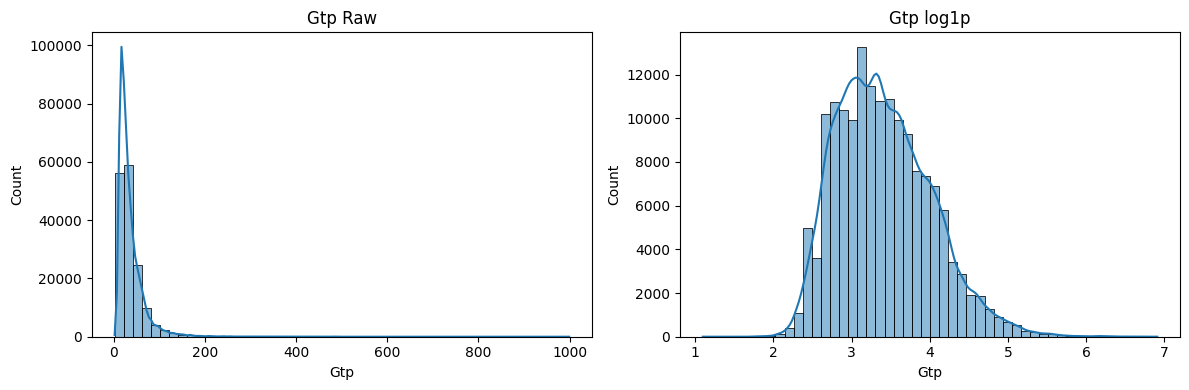

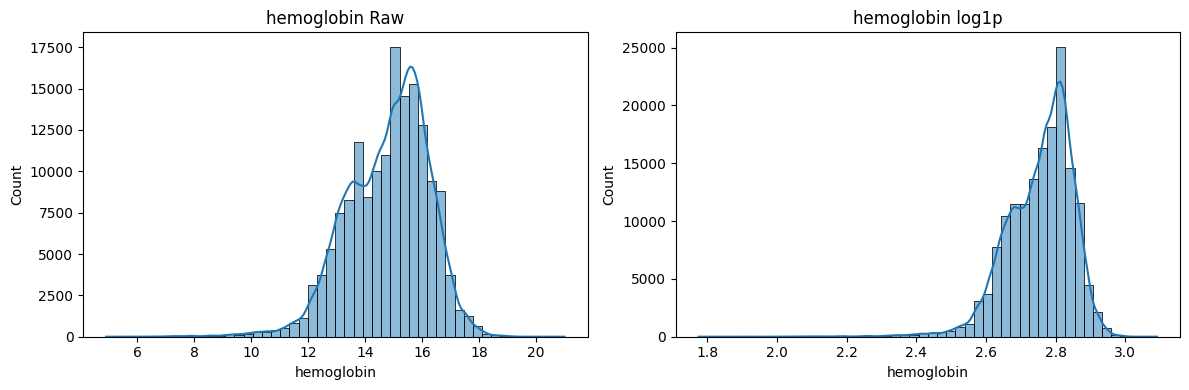

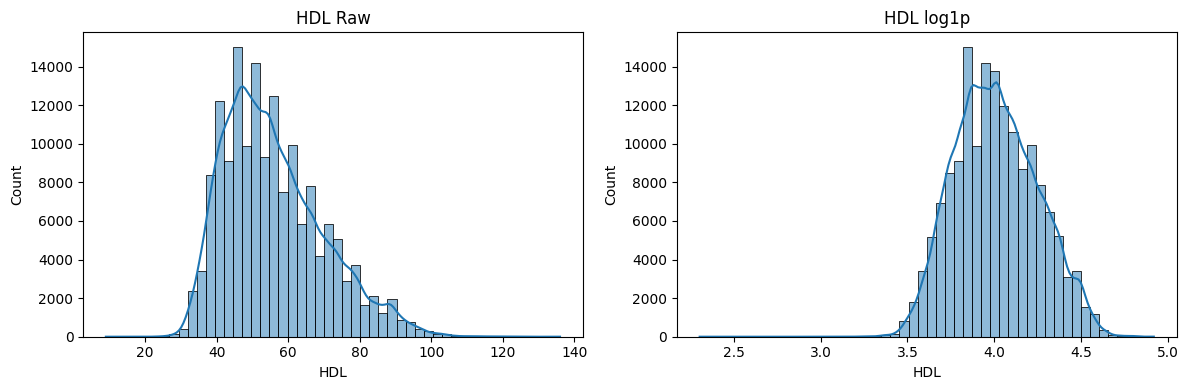

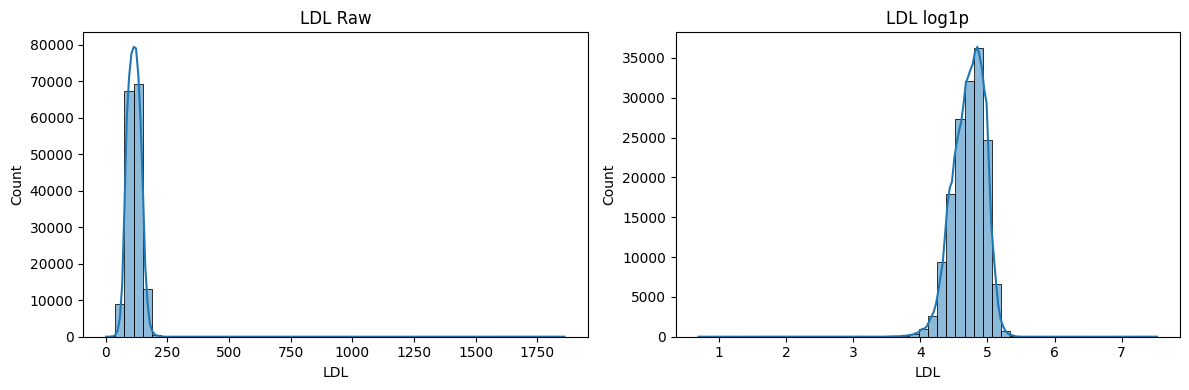

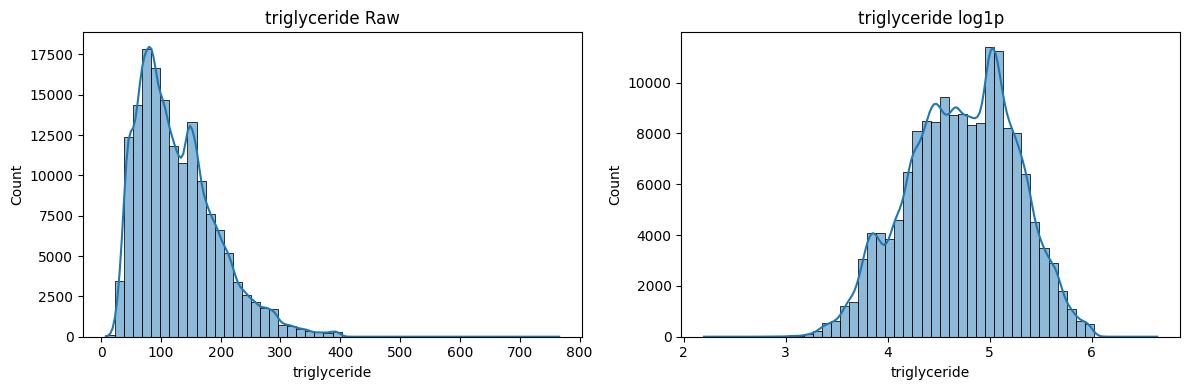

In [ ]:
# GTP, Hemoglobin, HDL/LDL, Triglyceride 분포+ log1p 비교
GTP_COL = "Gtp"
HEMO_COL = "hemoglobin"
HDL_COL= "HDL"
LDL_COL = "LDL"
TG_COL = "triglyceride"

for col in [GTP_COL, HEMO_COL, HDL_COL, LDL_COL, TG_COL]:
    if col not in train.columns:
        print(f"[WARN] {col} not found in columns!")
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(train[col], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Raw")

    sns.histplot(np.log1p(train[col]), bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f"{col} log1p")

    plt.tight_layout()
    plt.show()

- GTP는 반드시 log 변환 후 사용해야 함
- hemoglobin은 log 변환 불필요
- HDL은 log 변환이 성능을 약간 안정화할 순 있지만 필수는 아님
(하지만 비율 파생변수 만들려면 log 변환해서 함께 쓰는게 안정성↑)
- LDL은 log 변환 강력 추천
- TG는 반드시 log 변환 필요

In [ ]:
pd.set_option('display.max_rows', None)

# 혈압 이상치 체크(저혈압, 고혈압)
SYS_COL = "systolic"
REL_COL = "relaxation"

for col in [SYS_COL, REL_COL]:
    if col in train.columns:
        print(col)
        print(train[col].describe())
        print()

# 간단한 범위 체크
invalid_bp = train[
    (train[SYS_COL] < 90) | (train[SYS_COL] > 140) |
    (train[REL_COL] < 60) | (train[REL_COL] > 90)
]
invalid_bp.head()

systolic
count    159256.000000
mean        122.503648
std          12.729315
min          77.000000
25%         114.000000
50%         121.000000
75%         130.000000
max         213.000000
Name: systolic, dtype: float64

relaxation
count    159256.000000
mean         76.874071
std           8.994642
min          44.000000
25%          70.000000
50%          78.000000
75%          82.000000
max         133.000000
Name: relaxation, dtype: float64



,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,eye_left_bin,eye_right_bin,hear_left_bin,hear_right_bin,LDL_bin,Creatinine_bin,AST_bin,ALT_bin,GTP_bin
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0,Very Bad (0.1~2),Very Bad (0.1~2),Moderate Loss (1.7~2.0),Moderate Loss (1.7~2.0),Borderline (100-129),Normal (0.5-1.5),Normal (<45),Normal (<40),Normal (<60)
5,5,50,170,55,51.0,1.2,1.2,1,1,146,95,101,199,343,31,99,15.9,1,0.7,24,42,119,1,1,Very Bad (0.1~2),Very Bad (0.1~2),Normal (1.0~1.3),Normal (1.0~1.3),Normal (<100),Normal (0.5-1.5),Normal (<45),Mild (40-120),Elevated (60-200)
6,6,45,160,55,69.0,1.5,1.2,1,1,150,88,84,222,153,69,122,13.0,1,0.7,17,12,16,0,0,Very Bad (0.1~2),Very Bad (0.1~2),Normal (1.0~1.3),Normal (1.0~1.3),Borderline (100-129),Normal (0.5-1.5),Normal (<45),Normal (<40),Normal (<60)
7,7,55,155,60,84.5,0.7,0.9,1,1,137,91,100,282,165,51,198,14.5,1,0.7,16,15,16,0,0,Very Bad (0.1~2),Very Bad (0.1~2),Normal (1.0~1.3),Normal (1.0~1.3),Extremely High (>=190),Normal (0.5-1.5),Normal (<45),Normal (<40),Normal (<60)
17,17,45,175,80,92.0,0.6,0.3,1,1,155,94,114,208,182,56,115,14.4,1,1.2,22,16,22,1,0,Very Bad (0.1~2),Very Bad (0.1~2),Normal (1.0~1.3),Normal (1.0~1.3),Borderline (100-129),Normal (0.5-1.5),Normal (<45),Normal (<40),Normal (<60)


이상치가 아주 많지 않으니까 그대로 둘까..... 일단 고혈압 5명

In [ ]:
# 주요 변수 리스트 정의(for 흡연자 vs 비흡연자 분포 비교)
BMI_COLS = ["height(cm)", "weight(kg)", "waist(cm)"]
BP_COLS = [SYS_COL, REL_COL]
LIPID_COLS = ["Cholesterol", "triglyceride", "HDL", "LDL"]
LIVER_COLS = ["AST", "ALT", "Gtp"]
KIDNEY_COLS = ["Urine protein", "serum creatinine"]
HB_COL = "hemoglobin"
DENTAL_COL = "dental caries"

key_cols = BMI_COLS + BP_COLS + LIPID_COLS + LIVER_COLS + KIDNEY_COLS + [HB_COL, DENTAL_COL]
key_cols = [c for c in key_cols if c in train.columns]
key_cols

['height(cm)',
 'weight(kg)',
 'waist(cm)',
 'systolic',
 'relaxation',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'AST',
 'ALT',
 'Gtp',
 'Urine protein',
 'serum creatinine',
 'hemoglobin',
 'dental caries']

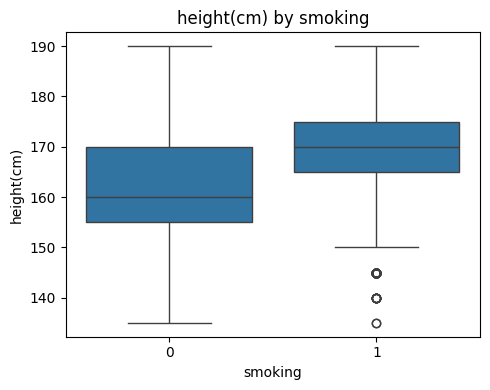

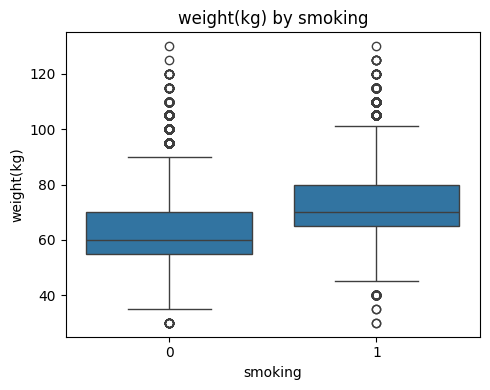

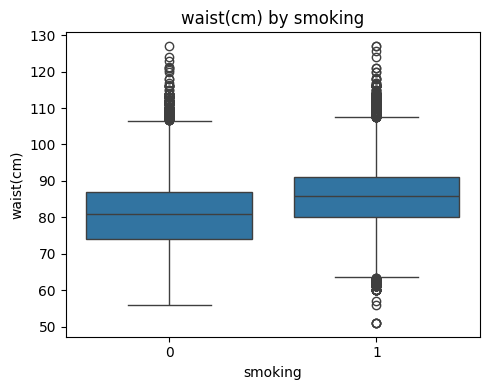

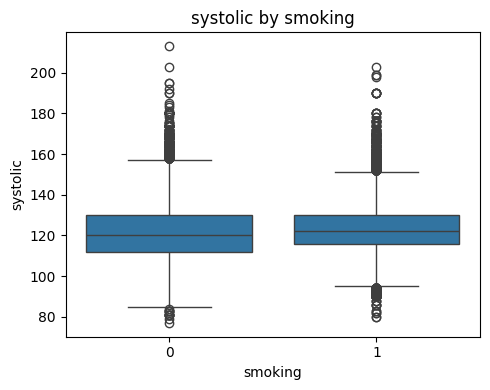

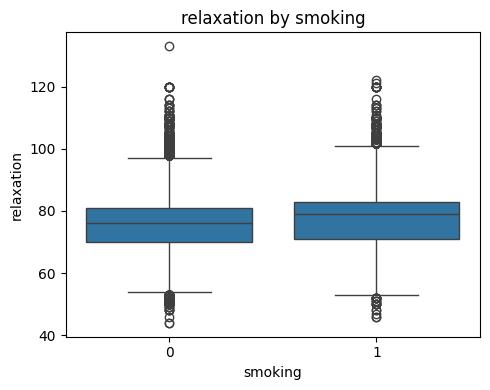

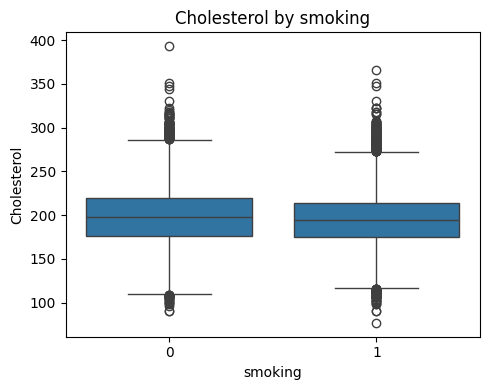

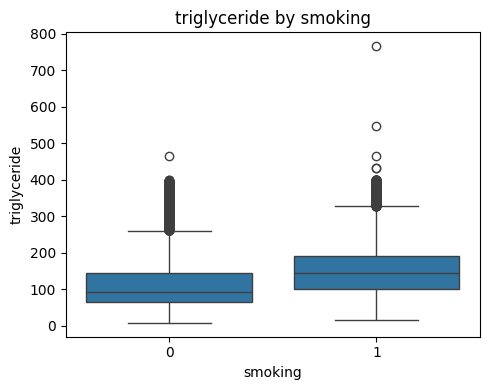

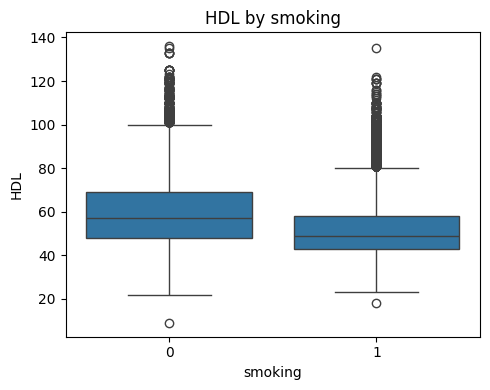

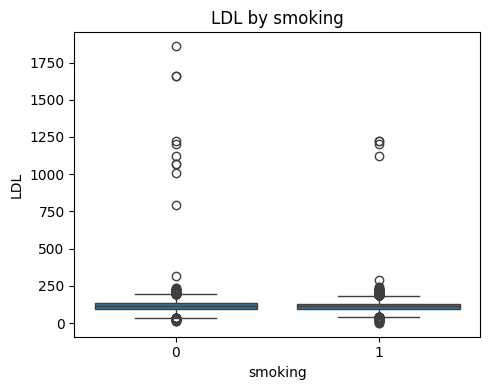

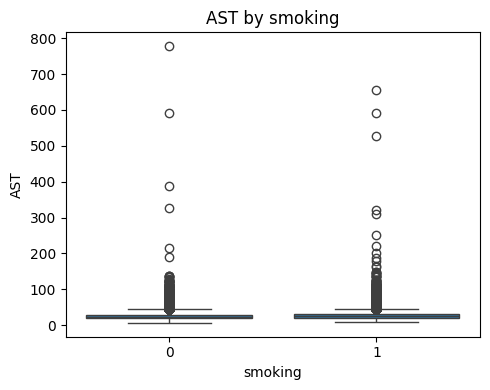

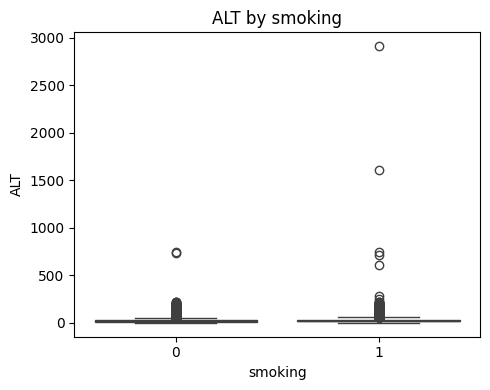

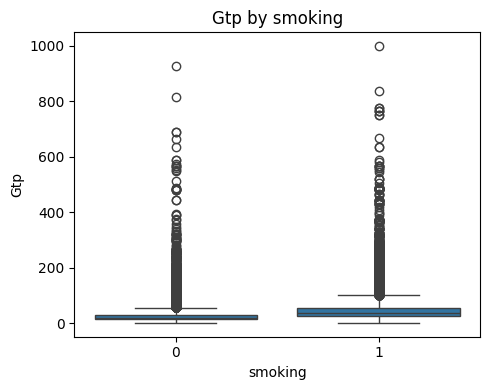

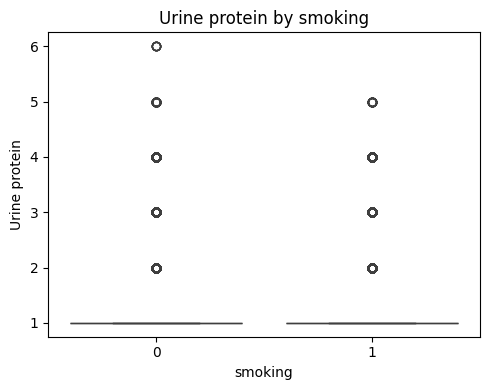

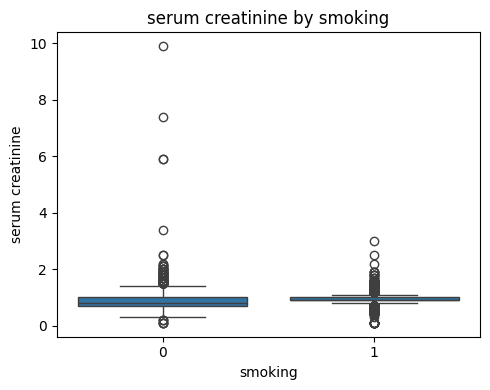

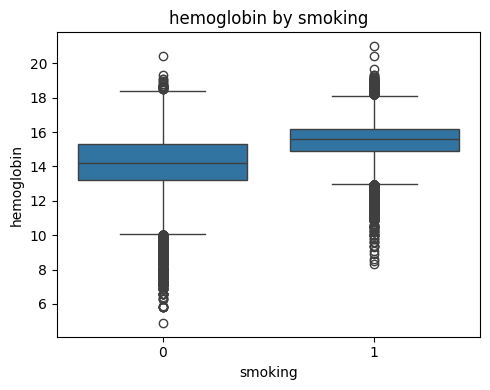

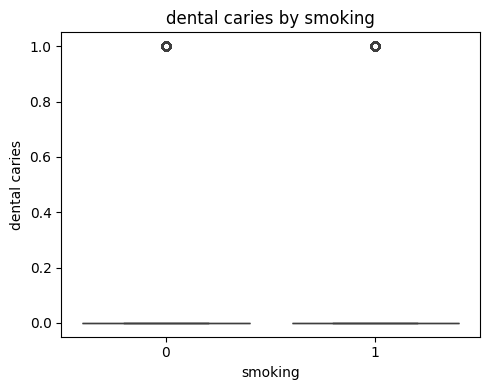

In [ ]:
# Boxplot: Feature vs Smoking
def boxplot_by_smoking(col, df=train, target=target_col):
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} by {target}")
    plt.tight_layout()
    plt.show()

for col in key_cols:
    # dental caries 같이 이산값/카테고리는 boxplot보다 countplot이 나을 수 있음
    if str(train[col].dtype) in ["int64", "float64"]:
        boxplot_by_smoking(col)

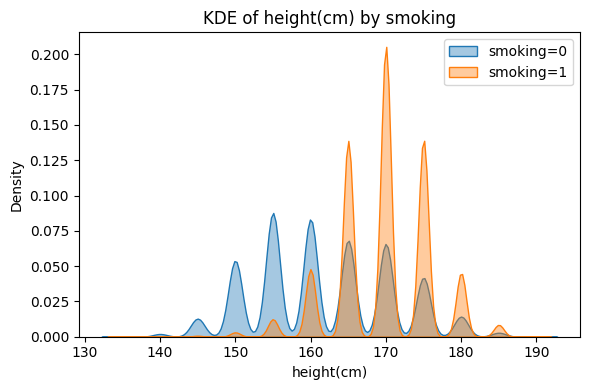

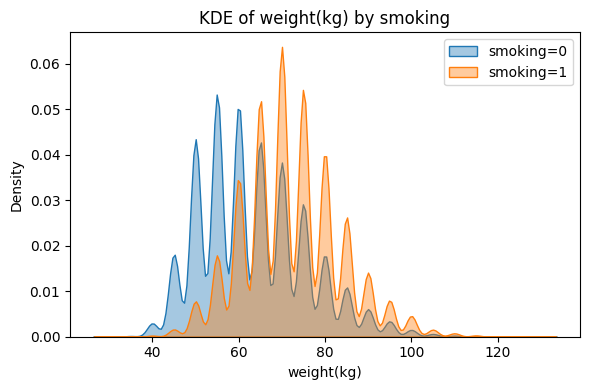

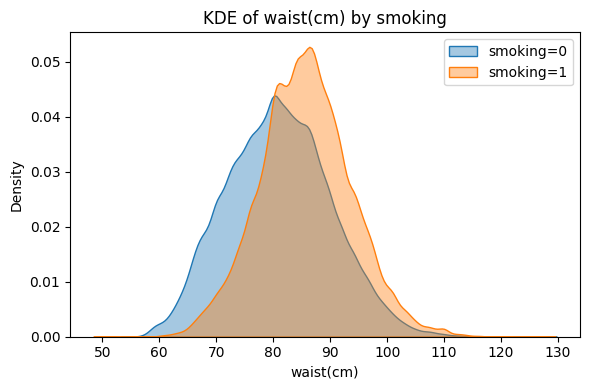

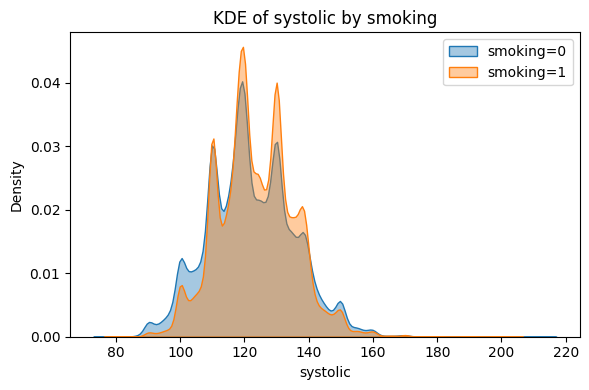

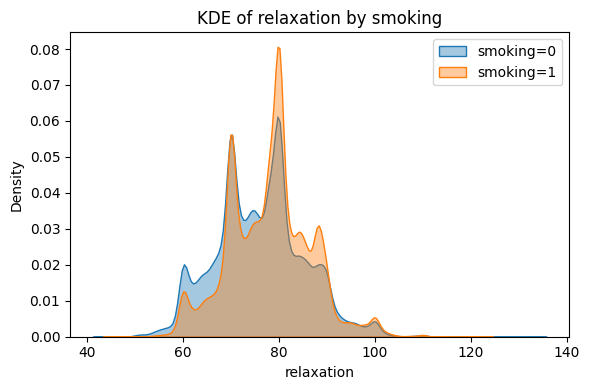

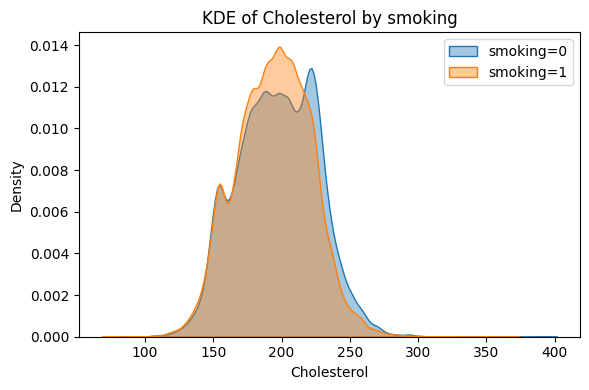

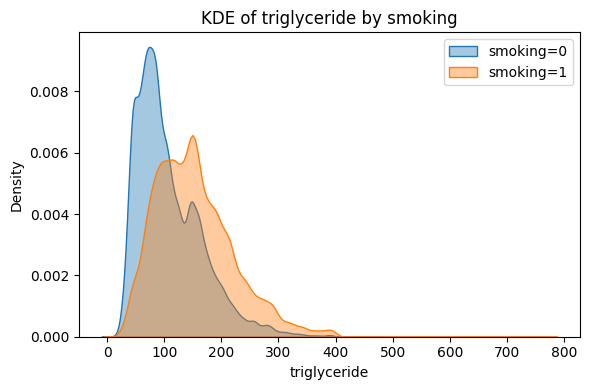

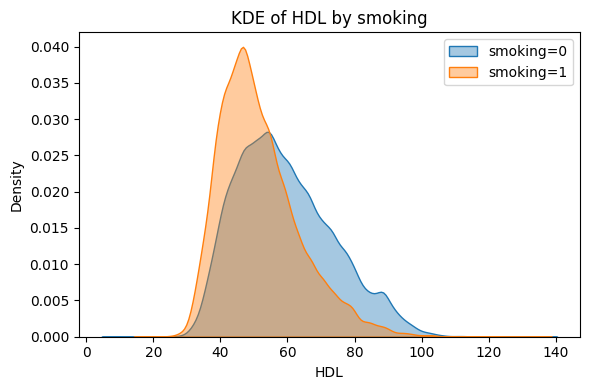

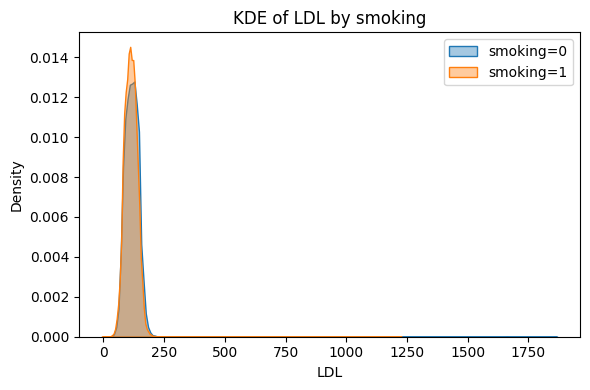

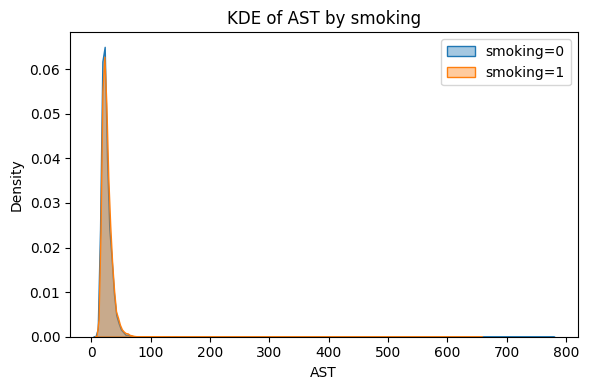

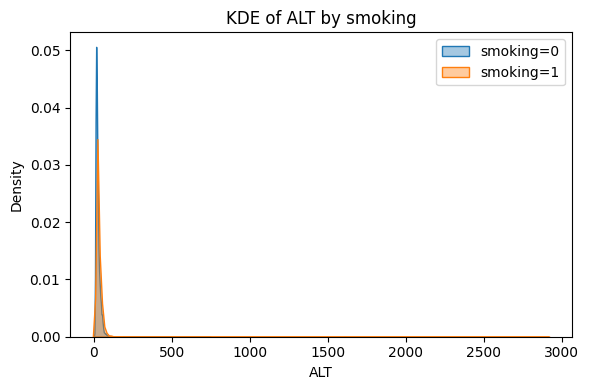

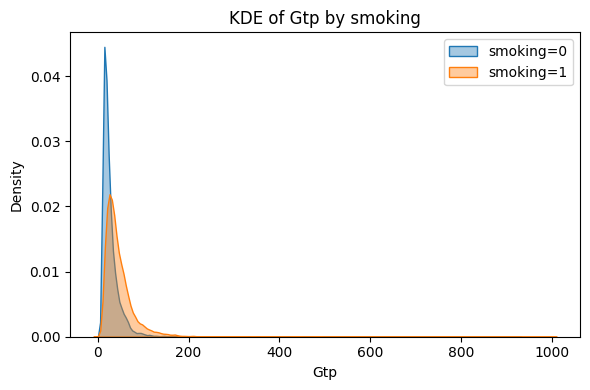

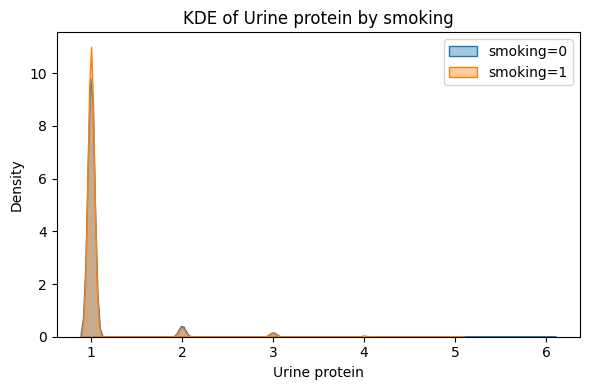

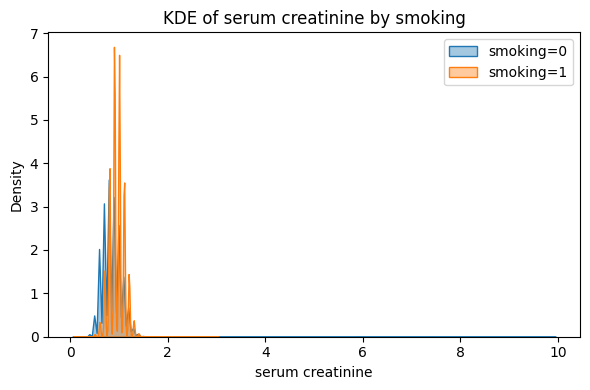

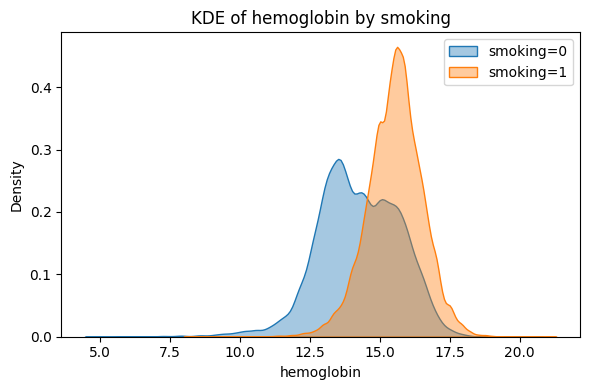

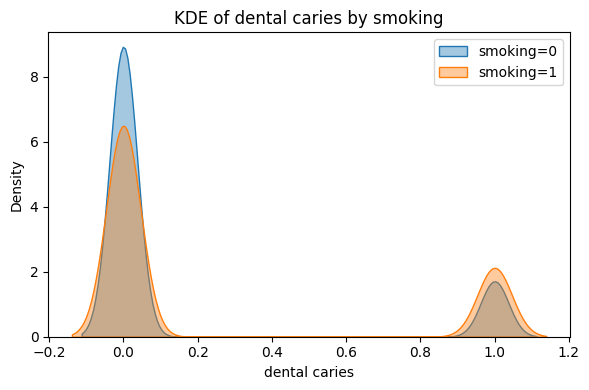

In [ ]:
# KDE Plot: 흡연자 vs 비흡연자 분포
def kde_by_smoking(col, df=train, target=target_col):
    plt.figure(figsize=(6, 4))
    for label, color in zip([0, 1], ["blue", "red"]):
        subset = df[df[target] == label]
        sns.kdeplot(
            subset[col],
            label=f"{target}={label}",
            fill=True,
            common_norm=False,
            alpha=0.4
        )
    plt.title(f"KDE of {col} by {target}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 연속형 변수 위주로
for col in [c for c in key_cols if str(train[c].dtype) in ["int64", "float64"]]:
    kde_by_smoking(col)

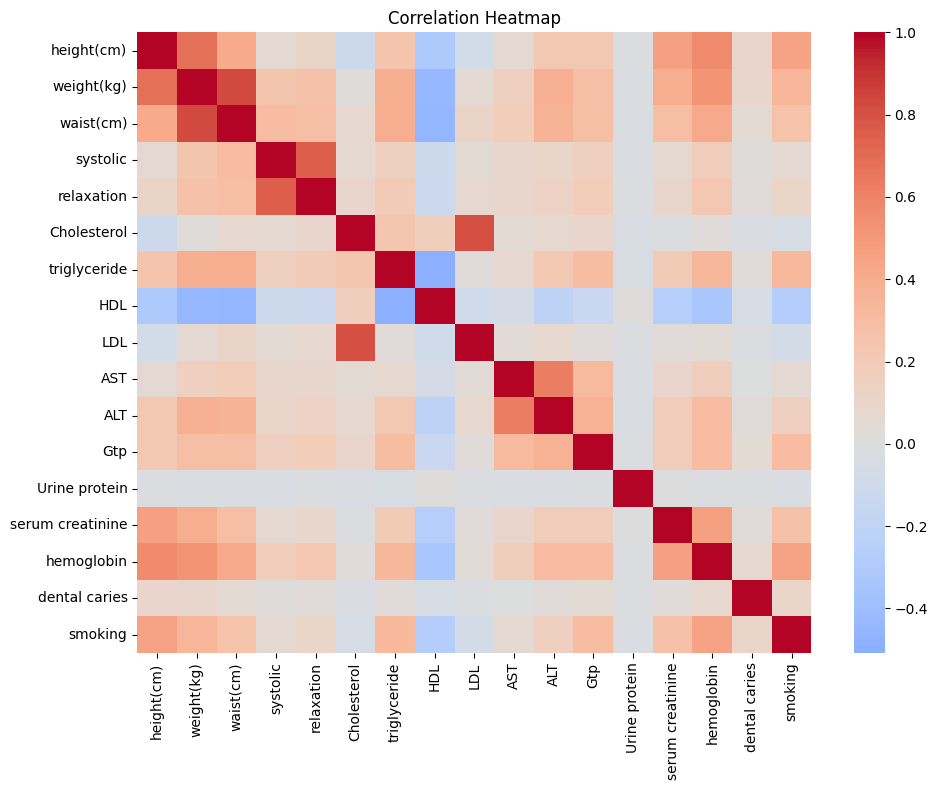

In [ ]:
# 상관관계 Heatmap
corr_cols = [c for c in key_cols if c != target_col]
corr = train[corr_cols + [target_col]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

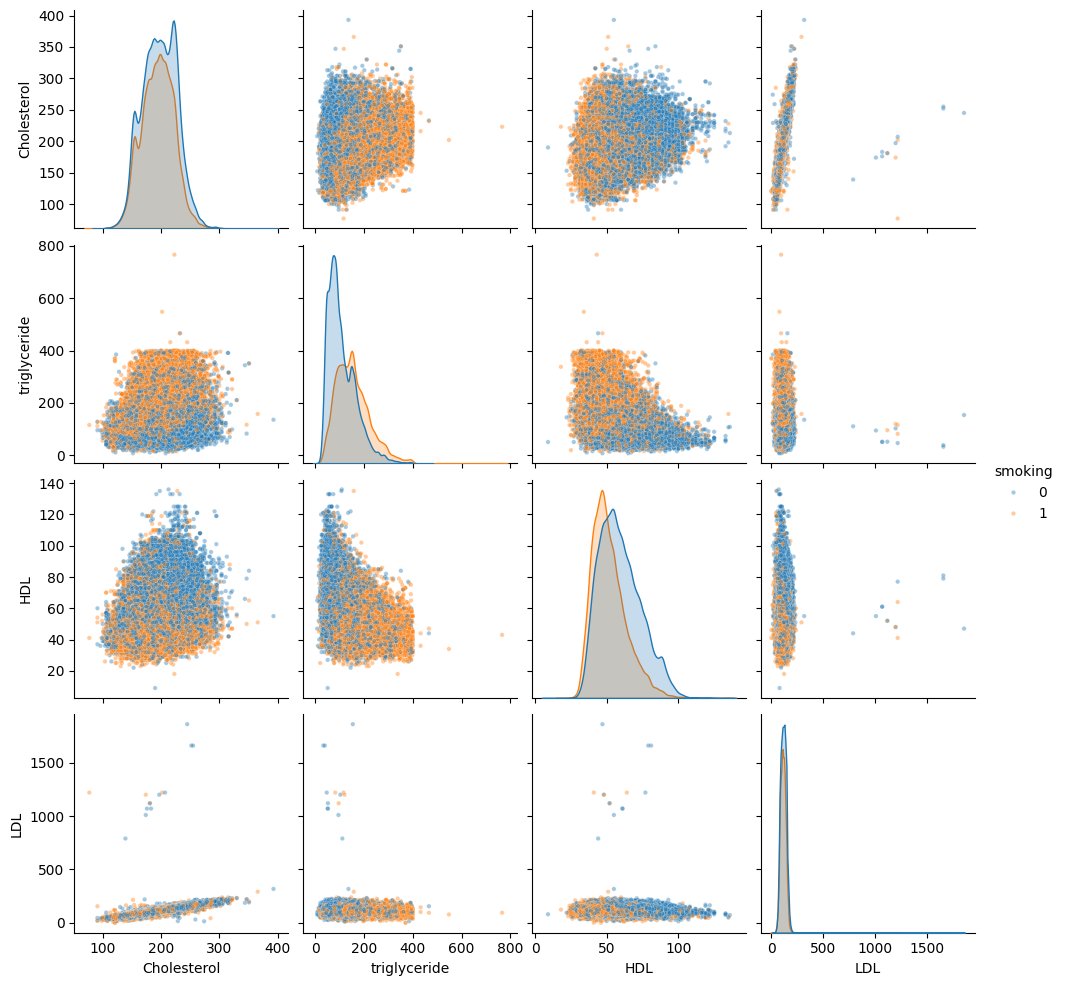

In [ ]:
# 지질계열 PairPlot
lipid_cols = [c for c in LIPID_COLS if c in train.columns]
if len(lipid_cols) > 0:
    sns.pairplot(
        train[lipid_cols + [target_col]],
        hue=target_col,
        diag_kind="kde",
        plot_kws={"alpha": 0.4, "s": 10}
    )

**전처리 및 이상치 제거**

In [ ]:
import numpy as np
import pandas as pd

def preprocess(df, is_train=True):

    # --------------------
    # 1. 타겟 제거
    # --------------------
    if is_train:
        y = df["smoking"]
    else:
        y = None

    drop_cols = ["id", "Urine protein", "dental caries"]

    if "smoking" in df.columns:
        drop_cols.append("smoking")

    df = df.drop(columns=drop_cols)

    # --------------------
    # 2. 파생 변수 생성
    # --------------------
    df["BMI"] = df["weight(kg)"] / ((df["height(cm)"] / 100)**2)
    df["weight_waist_interaction"] = df["weight(kg)"] * df["waist(cm)"]

    df["BMI_AST_interaction"] = df["BMI"] * df["AST"]
    df["BMI_ALT_interaction"] = df["BMI"] * df["ALT"]
    df["BMI_GTP_interaction"] = df["BMI"] * df["Gtp"]

    df["HDL_risk"] = df["HDL"] / (df["LDL"] + 1e-3)
    df["TG_risk"] = df["triglyceride"] / (df["HDL"] + 1e-3)

    df["average_blood_pressure"] = (df["systolic"] + df["relaxation"]) / 2
    df["pulse_pressure"] = df["systolic"] - df["relaxation"]

    df["eyesight_diff"] = (df["eyesight(left)"] - df["eyesight(right)"]).abs()
    df["hearing_diff"] = (df["hearing(left)"] - df["hearing(right)"]).abs()
    df["eyesight_avg"] = (df["eyesight(left)"] + df["eyesight(right)"]) / 2
    df["hearing_avg"] = (df["hearing(left)"] + df["hearing(right)"]) / 2

    # --------------------
    # 3. 로그 변환
    # --------------------
    log_cols = ["Gtp", "triglyceride", "AST", "ALT", "LDL"]
    for col in log_cols:
        df[f"{col}_log"] = np.log1p(df[col])

    # --------------------
    # 4. Binning (범주화)
    # --------------------
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 29, 39, 49, 59, 69, 79, 120],
        labels=["20", "30", "40", "50", "60", "70", "80"],
        include_lowest=True
    )

    df["BMI_bin"] = pd.cut(
        df["BMI"],
        bins=[0, 18.5, 25, 30, 100],
        labels=["Under", "Normal", "Over", "Obese"]
    )

    df["eye_left_bin"] = pd.cut(
        df["eyesight(left)"], bins=[0, 0.5, 1, 1.5, 3, 10],
        labels=["Very Bad", "Bad", "Normal", "Good", "Very Good"]
    )
    df["eye_right_bin"] = pd.cut(
        df["eyesight(right)"], bins=[0, 0.5, 1, 1.5, 3, 10],
        labels=["Very Bad", "Bad", "Normal", "Good", "Very Good"]
    )

    df["hearing_left_bin"] = pd.cut(
        df["hearing(left)"], bins=[0, 1.0, 1.3, 3],
        labels=["Normal", "Mild", "Moderate"]
    )
    df["hearing_right_bin"] = pd.cut(
        df["hearing(right)"], bins=[0, 1.0, 1.3, 3],
        labels=["Normal", "Mild", "Moderate"]
    )

    # --------------------
    # 5. One-hot encoding (기본 bin 컬럼)
    # --------------------
    base_cat_cols = [
        "age_group", "BMI_bin",
        "eye_left_bin", "eye_right_bin",
        "hearing_left_bin", "hearing_right_bin"
    ]
    df = pd.get_dummies(df, columns=base_cat_cols)

    # --------------------
    # 6. 남아 있는 category bin 7개도 OHE
    # --------------------
    extra_cat_cols = [
        "hear_left_bin", "hear_right_bin",
        "LDL_bin", "Creatinine_bin",
        "AST_bin", "ALT_bin", "GTP_bin"
    ]

    # 실제 df에 존재하는 컬럼만 대상 (안전하게 처리)
    extra_cat_cols = [c for c in extra_cat_cols if c in df.columns]

    df = pd.get_dummies(df, columns=extra_cat_cols)

    # --------------------
    # 7. IQR 기반 이상치 clip
    # --------------------
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)

    return df, y


In [ ]:
import re

def clean_columns(df):
    df = df.copy()
    df.columns = [
        re.sub(r'[^0-9a-zA-Z_]', '_', str(c))  # 영문/숫자/밑줄만 남기고 나머지는 _
        for c in df.columns
    ]
    return df

# 전처리 이후에 한 번만 수행
X_train, y = preprocess(train, is_train=True)
X_test, _ = preprocess(test, is_train=False)

X_train = clean_columns(X_train)
X_test  = clean_columns(X_test)

print(X_train.columns[:20])

Index(['age', 'height_cm_', 'weight_kg_', 'waist_cm_', 'eyesight_left_',
       'eyesight_right_', 'hearing_left_', 'hearing_right_', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum_creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')


**전처리 전/후 비교 및 확인**

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 98 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     159256 non-null  float64
 1   height_cm_                              159256 non-null  int64  
 2   weight_kg_                              159256 non-null  float64
 3   waist_cm_                               159256 non-null  float64
 4   eyesight_left_                          159256 non-null  float64
 5   eyesight_right_                         159256 non-null  float64
 6   hearing_left_                           159256 non-null  int64  
 7   hearing_right_                          159256 non-null  int64  
 8   systolic                                159256 non-null  int64  
 9   relaxation                              159256 non-null  int64  
 10  fasting_blood_sugar                     1592

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,159256.0,44.294727,11.807241,20.000000,40.000000,40.000000,55.000000,77.500000
height_cm_,159256.0,165.278960,8.780626,145.000000,160.000000,165.000000,170.000000,185.000000
weight_kg_,159256.0,67.067903,12.365353,37.500000,60.000000,65.000000,75.000000,97.500000
waist_cm_,159256.0,82.985894,8.904865,59.000000,77.000000,83.000000,89.000000,107.000000
eyesight_left_,159256.0,0.998830,0.307547,0.200000,0.800000,1.000000,1.200000,1.800000
eyesight_right_,159256.0,0.994869,0.306726,0.200000,0.800000,1.000000,1.200000,1.800000
hearing_left_,159256.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
hearing_right_,159256.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
systolic,159256.0,122.442244,12.529206,90.000000,114.000000,121.000000,130.000000,154.000000
relaxation,159256.0,76.848565,8.907331,52.000000,70.000000,78.000000,82.000000,100.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distribution(df_before, df_after, col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.kdeplot(df_before[col], ax=axes[0])
    axes[0].set_title(f"Before Processing: {col}")

    sns.kdeplot(df_after[col], ax=axes[1])
    axes[1].set_title(f"After Processing: {col}")

    plt.show()

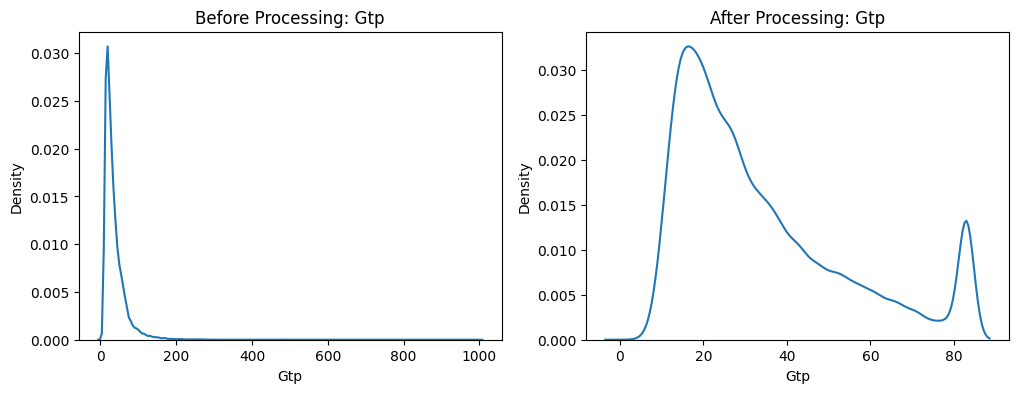

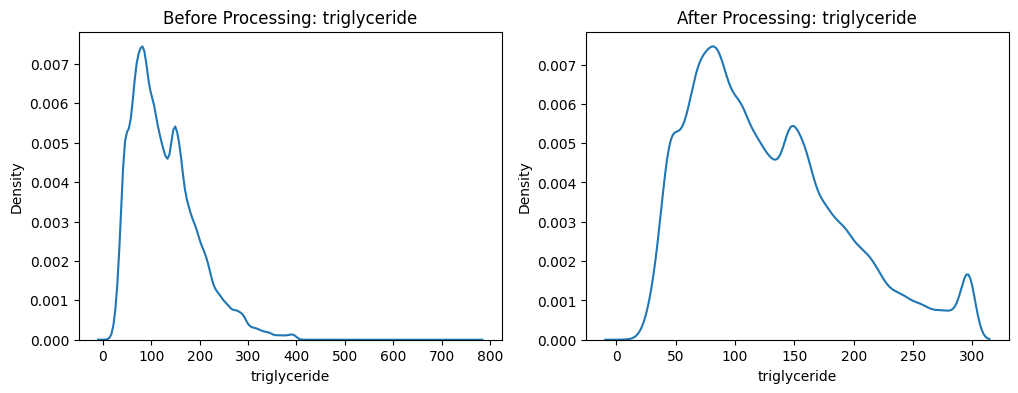

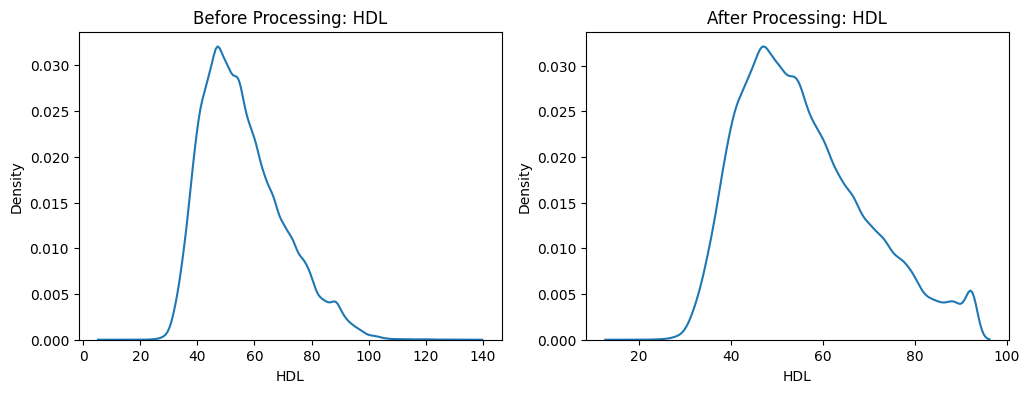

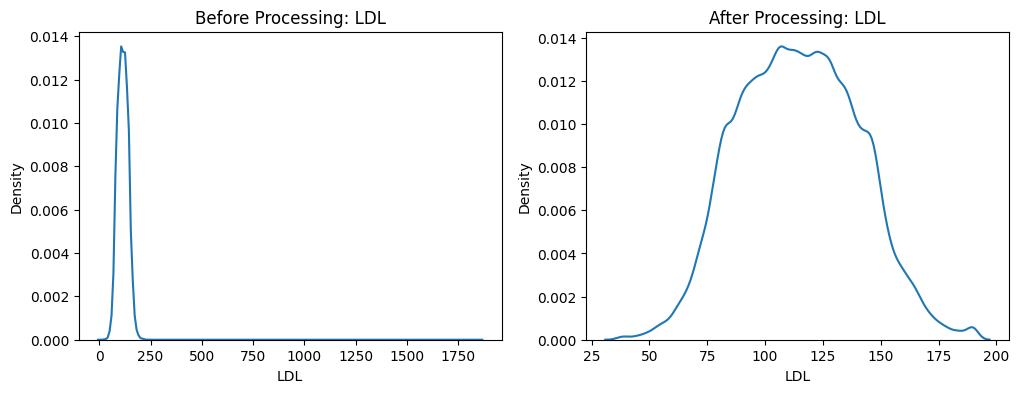

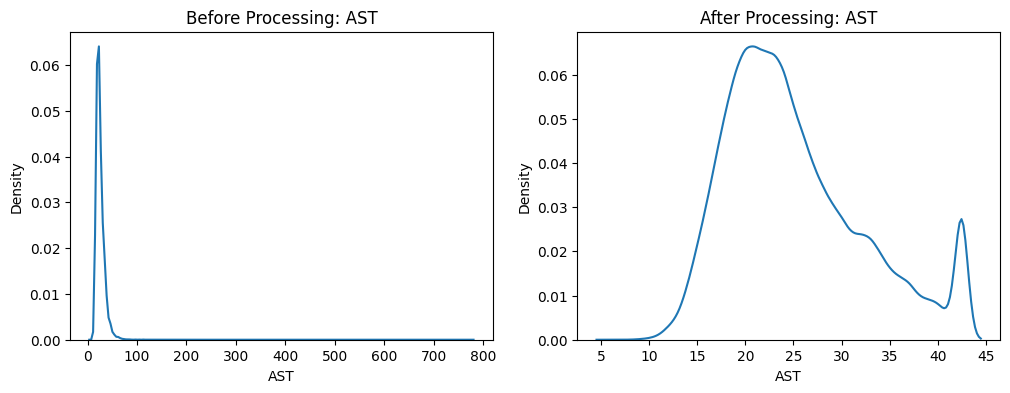

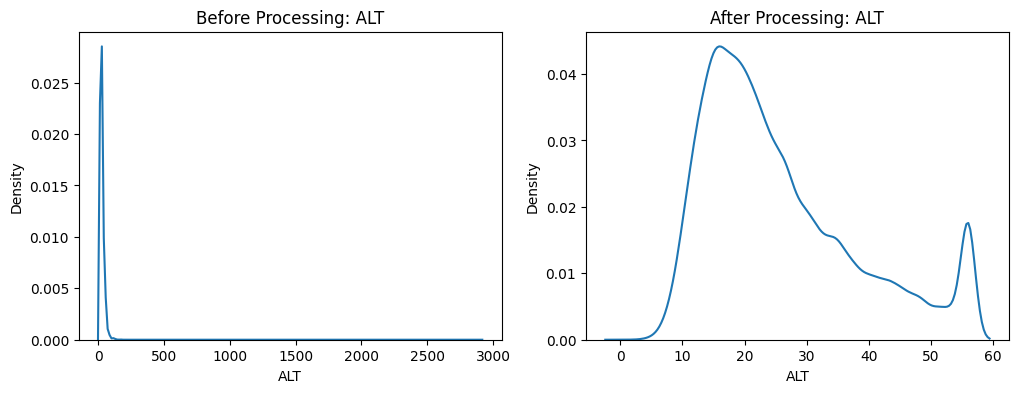

In [ ]:
compare_distribution(train, X_train, "Gtp")
compare_distribution(train, X_train, "triglyceride")
compare_distribution(train, X_train, "HDL")
compare_distribution(train, X_train, "LDL")
compare_distribution(train, X_train, "AST")
compare_distribution(train, X_train, "ALT")

In [ ]:
def check_clip(df_before, df_after, cols):
    for col in cols:
        print(f"\n=== {col} ===")
        print("Before:", df_before[col].describe())
        print("After :", df_after[col].describe())
        fig, axes = plt.subplots(1, 2, figsize=(10,4))
        sns.boxplot(x=df_before[col], ax=axes[0])
        axes[0].set_title(f"{col} before")
        sns.boxplot(x=df_after[col], ax=axes[1])
        axes[1].set_title(f"{col} after")
        plt.show()


=== Gtp ===
Before: count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64
After : count    159256.000000
mean         33.731841
std          20.198613
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max          83.000000
Name: Gtp, dtype: float64


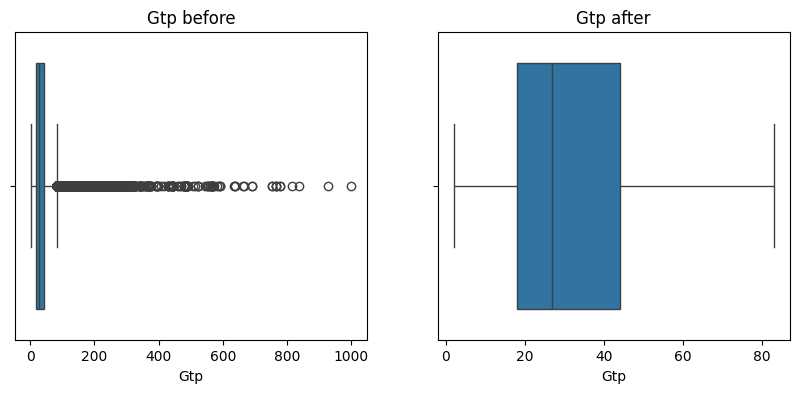


=== triglyceride ===
Before: count    159256.000000
mean        127.616046
std          66.188989
min           8.000000
25%          77.000000
50%         115.000000
75%         165.000000
max         766.000000
Name: triglyceride, dtype: float64
After : count    159256.000000
mean        126.819165
std          63.707227
min           8.000000
25%          77.000000
50%         115.000000
75%         165.000000
max         297.000000
Name: triglyceride, dtype: float64


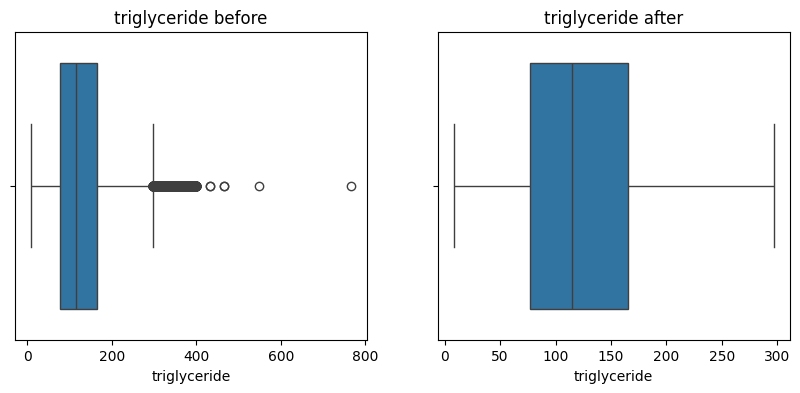


=== AST ===
Before: count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64
After : count    159256.000000
mean         25.102530
std           7.171154
min           6.500000
25%          20.000000
50%          24.000000
75%          29.000000
max          42.500000
Name: AST, dtype: float64


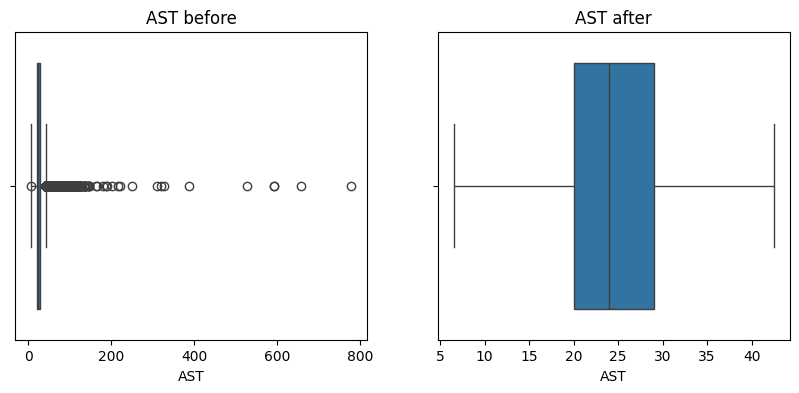


=== ALT ===
Before: count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64
After : count    159256.000000
mean         25.746999
std          12.465921
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max          56.000000
Name: ALT, dtype: float64


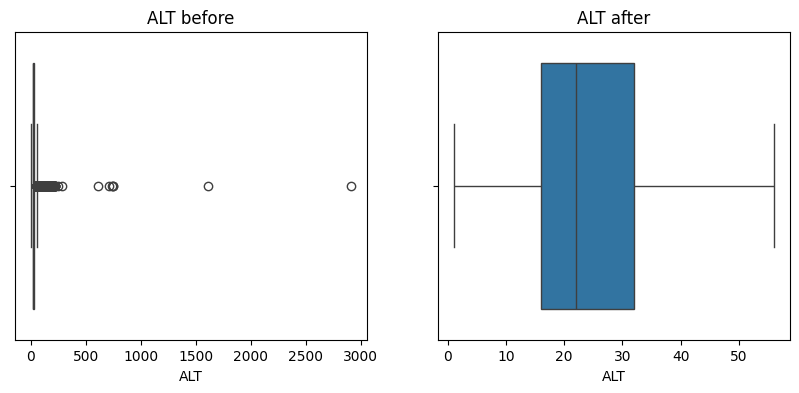


=== LDL ===
Before: count    159256.000000
mean        114.607682
std          28.158931
min           1.000000
25%          95.000000
50%         114.000000
75%         133.000000
max        1860.000000
Name: LDL, dtype: float64
After : count    159256.000000
mean        114.489777
std          25.853617
min          38.000000
25%          95.000000
50%         114.000000
75%         133.000000
max         190.000000
Name: LDL, dtype: float64


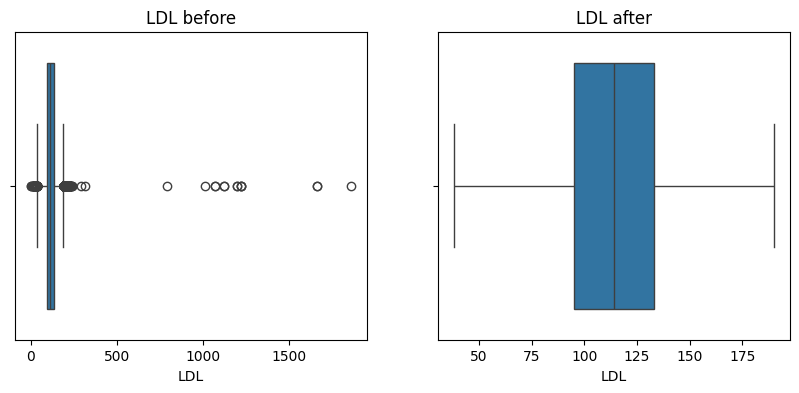

In [ ]:
check_clip(train, X_train, ["Gtp", "triglyceride", "AST", "ALT", "LDL"])

In [ ]:
def check_binning_ohe(X):
    print("\n[age_group] dummy cols:")
    print(X.filter(like="age_group_").sum())

    print("\n[BMI_bin] dummy cols:")
    print(X.filter(like="BMI_bin_").sum())

    print("\n[eye_left_bin] dummy cols:")
    print(X.filter(like="eye_left_bin_").sum())

    print("\n[hearing_left_bin] dummy cols:")
    print(X.filter(like="hearing_left_bin_").sum())

check_binning_ohe(X_train)


[age_group] dummy cols:
age_group_20    12969
age_group_30    24546
age_group_40    65172
age_group_50    29216
age_group_60    22682
age_group_70     3989
age_group_80      682
dtype: int64

[BMI_bin] dummy cols:
BMI_bin_Under      3878
BMI_bin_Normal    92189
BMI_bin_Over      55062
BMI_bin_Obese      8127
dtype: int64

[eye_left_bin] dummy cols:
eye_left_bin_Very_Bad     12803
eye_left_bin_Bad          87563
eye_left_bin_Normal       58178
eye_left_bin_Good           580
eye_left_bin_Very_Good      132
dtype: int64

[hearing_left_bin] dummy cols:
hearing_left_bin_Normal      155438
hearing_left_bin_Mild             0
hearing_left_bin_Moderate      3818
dtype: int64


**Train/Test 분리 + KFold**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Train/Validation 8:2 한 번 쪼개기
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y, test_size=0.2, random_state=42, stratify=y
)

# KFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**모델링**

In [ ]:
!pip install catboost --quiet

In [ ]:
!pip install optuna --quiet

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

import optuna
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

In [ ]:
# base_models = {
#     "lgbm": lgb.LGBMClassifier(
#         n_estimators=500,
#         learning_rate=0.05,
#         random_state=RANDOM_STATE,
#         n_jobs=-1
#     ),
#     "xgb": xgb.XGBClassifier(
#         n_estimators=500,
#         learning_rate=0.05,
#         max_depth=6,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         eval_metric="logloss",
#         random_state=RANDOM_STATE,
#         n_jobs=-1
#     ),
#     "rf": RandomForestClassifier(
#         n_estimators=300,
#         max_depth=None,
#         random_state=RANDOM_STATE,
#         n_jobs=-1
#     ),
#     "et": ExtraTreesClassifier(
#         n_estimators=300,
#         max_depth=None,
#         random_state=RANDOM_STATE,
#         n_jobs=-1
#     ),
#     "cat": CatBoostClassifier(
#         iterations=500,
#         learning_rate=0.05,
#         depth=6,
#         loss_function="Logloss",
#         verbose=0,
#         random_state=RANDOM_STATE
#     ),
#     "logreg": LogisticRegression(
#         max_iter=500,
#         solver="lbfgs",
#         n_jobs=-1
#     )
# }

In [ ]:
# def cv_evaluate_models(X, y, models, cv, scoring="roc_auc"):
#     results = {}
#     for name, model in models.items():
#         print(f"\n===== {name} =====")
#         fold_scores = []
#         for fold, (tr_idx, val_idx) in enumerate(cv.split(X, y), 1):
#             X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
#             y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

#             model.fit(X_tr, y_tr)
#             y_pred_proba = model.predict_proba(X_val)[:, 1]

#             score = roc_auc_score(y_val, y_pred_proba)
#             fold_scores.append(score)
#             print(f"Fold {fold}: AUC = {score:.4f}")

#         print(f"Mean AUC: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")
#         results[name] = fold_scores
#     return results

# cv_results = cv_evaluate_models(X_train, y, base_models, skf)


===== lgbm =====
[LightGBM] [Info] Number of positive: 55722, number of negative: 71682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3989
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437365 -> initscore=-0.251865
[LightGBM] [Info] Start training from score -0.251865
Fold 1: AUC = 0.8636
[LightGBM] [Info] Number of positive: 55722, number of negative: 71683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3991
[LightGBM] [Info] Number of data points in the train set: 127405, numbe

In [ ]:
# voting_clf = VotingClassifier(
#     estimators=[
#         ("lgbm", base_models["lgbm"]),
#         ("cat", base_models["cat"]),
#         ("xgb", xgb_model["xgb"])
#     ],
#     voting="soft",
#     weights=[0.3, 0.3, 0.4],
#     n_jobs=-1
# )

# # CV로 평가
# cv_results_vote = cv_evaluate_models(
#     X_train, y, {"voting": voting_clf}, skf
# )


===== voting =====
Fold 1: AUC = 0.8652
Fold 2: AUC = 0.8679
Fold 3: AUC = 0.8674
Fold 4: AUC = 0.8655
Fold 5: AUC = 0.8672
Mean AUC: 0.8667 ± 0.0011


In [ ]:
# stack_base_estimators = [
#     ("lgbm", base_models["lgbm"]),
#     ("xgb", xgb_model["xgb"]),
#     ("cat", base_models["cat"]),
#     ("rf", base_models["rf"]),
#     ("logreg", base_models["logreg"]),
# ]

# meta_model = LogisticRegression(
#     max_iter=500,
#     solver="lbfgs",
#     n_jobs=-1
# )

# stack_clf = StackingClassifier(
#     estimators=stack_base_estimators,
#     final_estimator=meta_model,
#     stack_method="predict_proba",
#     passthrough=False,
#     n_jobs=-1
# )

# cv_results_stack = cv_evaluate_models(
#     X_train, y, {"stacking": stack_clf}, skf
# )



===== stacking =====
Fold 1: AUC = 0.8655


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fold 2: AUC = 0.8685


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fold 3: AUC = 0.8677
Fold 4: AUC = 0.8654


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fold 5: AUC = 0.8675
Mean AUC: 0.8669 ± 0.0013


**Optuna 튜닝**

In [ ]:
# def objective_xgb(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "min_child_weight": trial.suggest_float("min_child_weight", 1e-1, 10.0, log=True),
#         "subsample": trial.suggest_float("subsample", 0.6, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.0, 5.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 1e-4, 10.0, log=True),
#         "reg_alpha": trial.suggest_float("reg_alpha", 1e-4, 10.0, log=True),
#         "eval_metric": "logloss",
#         "random_state": RANDOM_STATE,
#         "n_jobs": -1,
#         "tree_method": "hist",   # Colab GPU 아니면 hist가 빠르고 안정적
#         "objective": "binary:logistic"
#     }

#     model = xgb.XGBClassifier(**params)

#     aucs = []
#     for tr_idx, val_idx in skf.split(X_train, y):
#         X_tr, X_val = X_train.iloc[tr_idx], X.iloc[val_idx]
#         y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

#         model.fit(X_tr, y_tr)
#         y_pred_proba = model.predict_proba(X_val)[:, 1]
#         auc = roc_auc_score(y_val, y_pred_proba)
#         aucs.append(auc)

#     return np.mean(aucs)


# study_xgb = optuna.create_study(direction="maximize")
# study_xgb.optimize(objective_xgb, n_trials=30)

# print("Best params (XGB):", study_xgb.best_params)
# print("Best AUC (XGB):", study_xgb.best_value)


[I 2025-11-28 01:32:25,811] A new study created in memory with name: no-name-56760f5a-04ea-4a01-8117-06a0183ef12b
[I 2025-11-28 01:33:22,923] Trial 0 finished with value: 0.8656852856759745 and parameters: {'n_estimators': 567, 'learning_rate': 0.10215774552181774, 'max_depth': 3, 'min_child_weight': 7.101870540204959, 'subsample': 0.7159655543008829, 'colsample_bytree': 0.6872122586053679, 'gamma': 3.412464869609983, 'reg_lambda': 0.030185704318632753, 'reg_alpha': 0.19730430776339536}. Best is trial 0 with value: 0.8656852856759745.
[I 2025-11-28 01:37:53,500] Trial 1 finished with value: 0.8644319106225309 and parameters: {'n_estimators': 419, 'learning_rate': 0.016827656691678697, 'max_depth': 12, 'min_child_weight': 0.23925933841791958, 'subsample': 0.7339604788509411, 'colsample_bytree': 0.839741214062526, 'gamma': 2.624700795544068, 'reg_lambda': 0.07155561780077493, 'reg_alpha': 0.0014904960578352305}. Best is trial 0 with value: 0.8656852856759745.
[I 2025-11-28 01:39:25,578] 

Best params (XGB): {'n_estimators': 894, 'learning_rate': 0.02915032556754379, 'max_depth': 6, 'min_child_weight': 0.5320334644530591, 'subsample': 0.9742472903791866, 'colsample_bytree': 0.6442122947006718, 'gamma': 0.5529174523156124, 'reg_lambda': 1.4173869179861032, 'reg_alpha': 0.004476764022386471}
Best AUC (XGB): 0.8673185867559521


In [ ]:
xgb_model = {
    "xgb": xgb.XGBClassifier(
    n_estimators=894,
    learning_rate=0.02915032556754379,
    max_depth=6,
    min_child_weight=0.5320334644530591,
    subsample=0.9742472903791866,
    colsample_bytree=0.6442122947006718,
    gamma=0.5529174523156124,
    reg_lambda=1.4173869179861032,
    reg_alpha=0.2654017013026651,
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    n_jobs=-1,
    tree_method="hist",
    objective="binary:logistic"
    )
}

In [ ]:
def cv_evaluate_models(X, y, models, cv, scoring="roc_auc"):
    results = {}
    for name, model in models.items():
        print(f"\n===== {name} =====")
        fold_scores = []
        for fold, (tr_idx, val_idx) in enumerate(cv.split(X, y), 1):
            X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
            y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

            model.fit(X_tr, y_tr)
            y_pred_proba = model.predict_proba(X_val)[:, 1]

            score = roc_auc_score(y_val, y_pred_proba)
            fold_scores.append(score)
            print(f"Fold {fold}: AUC = {score:.4f}")

        print(f"Mean AUC: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")
        results[name] = fold_scores
    return results

cv_results = cv_evaluate_models(X_train, y, xgb_model, skf)


===== xgb =====
Fold 1: AUC = 0.8660
Fold 2: AUC = 0.8686
Fold 3: AUC = 0.8681
Fold 4: AUC = 0.8660
Fold 5: AUC = 0.8676
Mean AUC: 0.8673 ± 0.0011


**Feature Importance**

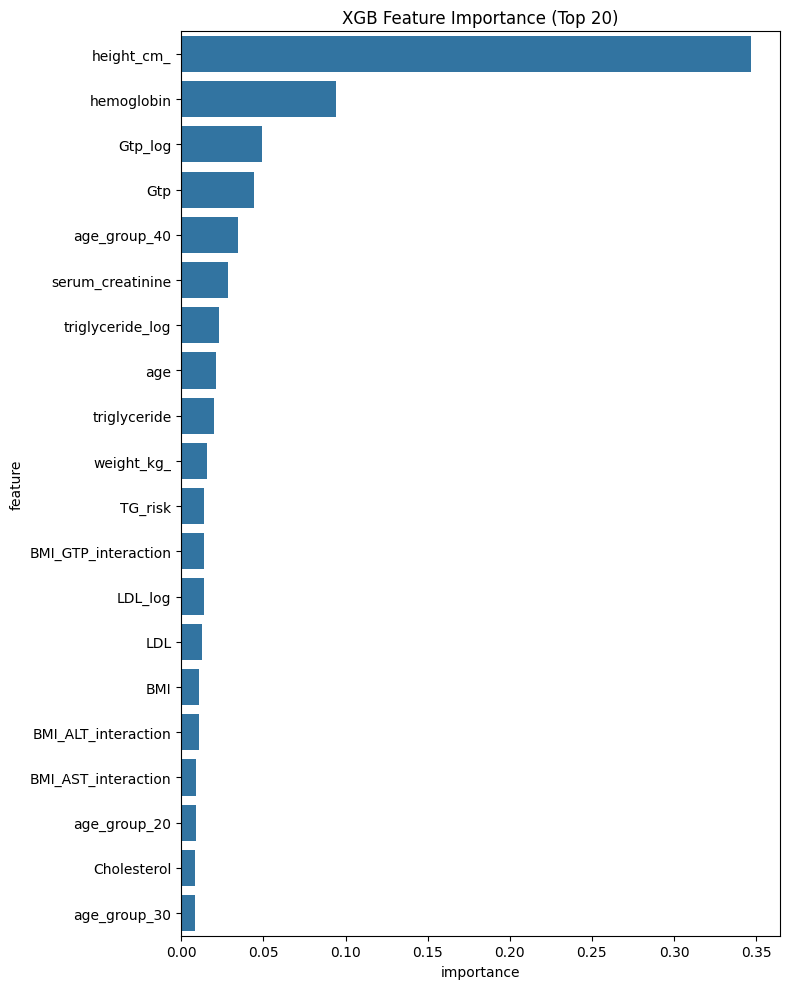

,feature,importance
1,height_cm_,0.347134
15,hemoglobin,0.094006
33,Gtp_log,0.049317
19,Gtp,0.044496
40,age_group_40,0.034310
16,serum_creatinine,0.028193
34,triglyceride_log,0.022980
0,age,0.021379
12,triglyceride,0.019698
2,weight_kg_,0.015727


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 딕셔너리에서 모델 꺼내오기
final_xgb = list(xgb_model.values())[0]

# 2. 전체 train 데이터로 한 번 더 학습
final_xgb.fit(X_train, y)

# 3. feature importance 계산
importances = final_xgb.feature_importances_
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

# 4. 상위 20개 정도 시각화
plt.figure(figsize=(8, 10))
sns.barplot(
    data=feat_imp.head(20),
    x="importance",
    y="feature"
)
plt.title("XGB Feature Importance (Top 20)")
plt.tight_layout()
plt.show()

# 필요하면 전체 표도 확인
feat_imp.head(30)

**PDP**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pdp_custom(model, X, feature, grid_resolution=20, sample_size=5000):
    """
    model: 학습된 분류 모델 (predict_proba 지원)
    X: pd.DataFrame (train 데이터)
    feature: str, PDP 그릴 컬럼명
    """
    # 연산량 줄이려고 샘플 일부만 사용 (선택)
    if len(X) > sample_size:
        X_sample = X.sample(sample_size, random_state=42)
    else:
        X_sample = X.copy()

    # feature 값 범위에서 grid 생성 (1%~99% 구간)
    x_min = X_sample[feature].quantile(0.01)
    x_max = X_sample[feature].quantile(0.99)
    grid = np.linspace(x_min, x_max, grid_resolution)

    pdp_values = []

    for v in grid:
        X_temp = X_sample.copy()
        X_temp[feature] = v
        proba = model.predict_proba(X_temp)[:, 1]  # smoking=1 확률
        pdp_values.append(proba.mean())

    plt.figure(figsize=(6, 4))
    plt.plot(grid, pdp_values, marker="o")
    plt.xlabel(feature)
    plt.ylabel("Predicted P(smoking=1)")
    plt.title(f"PDP - {feature}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



=== PDP for height_cm_ ===


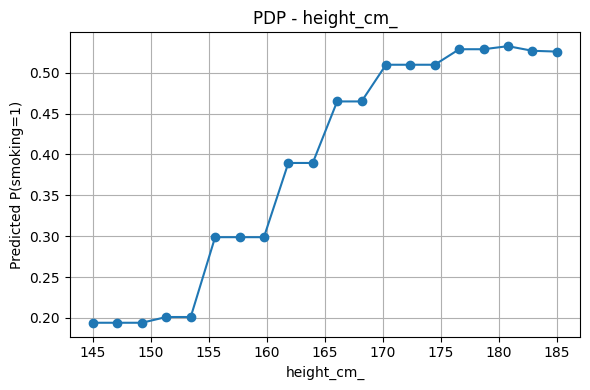


=== PDP for hemoglobin ===


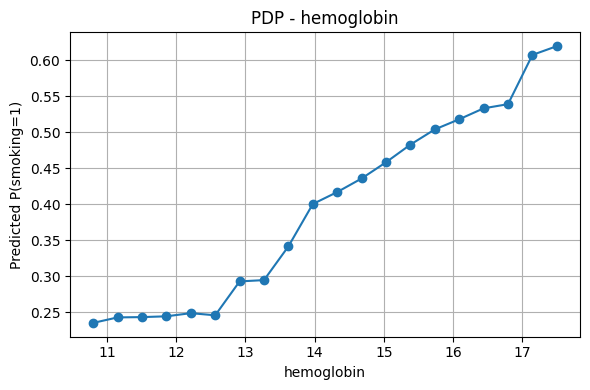


=== PDP for Gtp_log ===


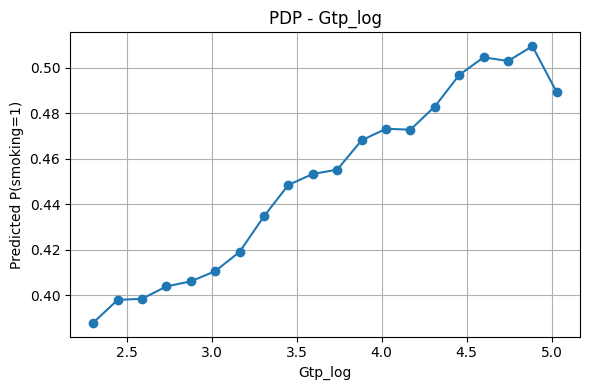


=== PDP for Gtp ===


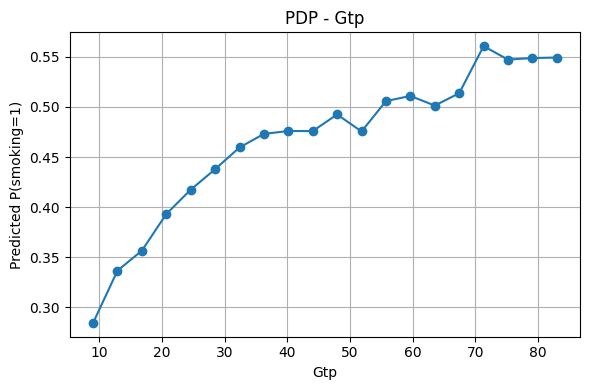


=== PDP for serum_creatinine ===


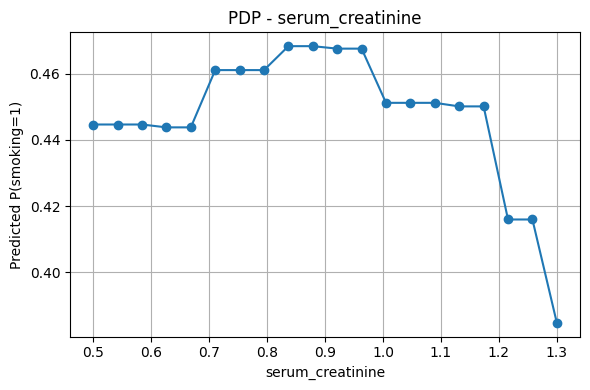


=== PDP for TG_risk ===


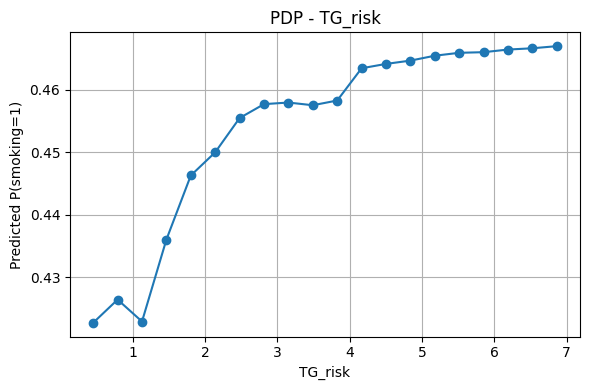

In [ ]:
# 중요도 순위 상위에서 보고 싶은 피처들
top_features_for_pdp = [
    "height_cm_",
    "hemoglobin",
    "Gtp_log",
    "Gtp",
    "serum_creatinine",
    "TG_risk"
]

for feat in top_features_for_pdp:
    print(f"\n=== PDP for {feat} ===")
    plot_pdp_custom(final_xgb, X_train, feat)